# Prep set

In [22]:
import pandas as pd
import ast

In [31]:
data="data_half_month"
with open(data, 'r') as r:
    res=pd.DataFrame()
    for x in r:
        # json module doesn't work here - not valid JSON provided
        line=pd.DataFrame([ast.literal_eval(x)])
        res=res.append(line)

In [36]:
res.count()

business     12763
cool         12763
date         12763
funny        12763
review_id    12763
stars        12763
text         12763
useful       12763
user_id      12763
dtype: int64

In [33]:
res.groupby('cool').count()

,business,date,funny,review_id,stars,text,useful,user_id
cool,,,,,,,,
0,8391,8391,8391,8391,8391,8391,8391,8391
1,2633,2633,2633,2633,2633,2633,2633,2633
2,846,846,846,846,846,846,846,846
3,383,383,383,383,383,383,383,383
4,183,183,183,183,183,183,183,183
5,100,100,100,100,100,100,100,100
6,63,63,63,63,63,63,63,63
7,45,45,45,45,45,45,45,45
8,35,35,35,35,35,35,35,35


In [34]:
res.groupby('useful').count()

,business,cool,date,funny,review_id,stars,text,user_id
useful,,,,,,,,
0,4292,4292,4292,4292,4292,4292,4292,4292
1,3377,3377,3377,3377,3377,3377,3377,3377
2,1902,1902,1902,1902,1902,1902,1902,1902
3,1102,1102,1102,1102,1102,1102,1102,1102
4,643,643,643,643,643,643,643,643
5,407,407,407,407,407,407,407,407
6,261,261,261,261,261,261,261,261
7,177,177,177,177,177,177,177,177
8,148,148,148,148,148,148,148,148


In [35]:
res.groupby('funny').count()

,business,cool,date,review_id,stars,text,useful,user_id
funny,,,,,,,,
0,8762,8762,8762,8762,8762,8762,8762,8762
1,2243,2243,2243,2243,2243,2243,2243,2243
2,792,792,792,792,792,792,792,792
3,348,348,348,348,348,348,348,348
4,194,194,194,194,194,194,194,194
5,118,118,118,118,118,118,118,118
6,88,88,88,88,88,88,88,88
7,48,48,48,48,48,48,48,48
8,44,44,44,44,44,44,44,44


In [41]:
useful_pos=res[res['useful']>0].sample(n=1000).copy()
useful_pos['classification']='useful'
useful_neg=res[res['useful']==0].sample(n=1000).copy()
useful_neg['classification']='not-useful'
useful_all=pd.concat([useful_pos, useful_neg])
useful_all=useful_all[['text', 'useful', 'classification']].reset_index(drop=True)
useful_all

,text,useful,classification
0,"Oh goodness, I don't like writing reviews like...",5,useful
1,I have been to PF Changs many many times. This...,1,useful
2,After reading reviews about the not so private...,2,useful
3,I haven't been to the Hi-liter in years but ha...,3,useful
4,I was expecting a few shelves with paperbacks ...,6,useful
5,I live about 20 min away from Wah Sun and had ...,2,useful
6,"When I first moved to OH, a gal at Michaels co...",1,useful
7,Came here to meet a friend for happy hour toda...,5,useful
8,I don't even know what to make of south americ...,8,useful
9,OK..... One good thing about Vegas is you can ...,2,useful


# Classification

In [44]:
import nltk
toker=nltk.tokenize.TweetTokenizer()

total number of words: 289643
unique words: 16383
words present only once: 8350


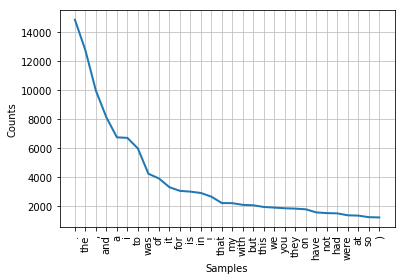

In [46]:
texts_tokenized = (toker.tokenize(row.text) for index, row in useful_all.iterrows())
all_words = nltk.FreqDist(w.lower() for tokens in texts_tokenized for w in tokens)

print('total number of words:', sum(all_words.values()))
print('unique words:', len(all_words))
print('words present only once:', sum(c for c in all_words.values() if c == 1))

all_words.plot(30)

feature words: 7995


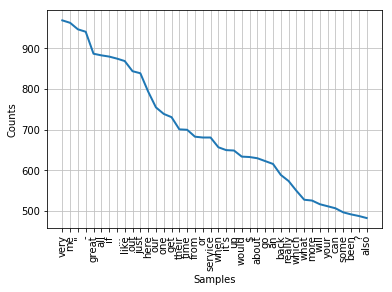

In [47]:
words = all_words.copy()
for w, count in all_words.items():
    if count > 1000 or count == 1:
        del words[w]

print('feature words:', len(words))
words.plot(40)

In [51]:
word_features = frozenset(words.keys())

def text_features(text):
    txt_words = set(toker.tokenize(text.lower()))
    features = {}
    for w in txt_words & word_features:
        features['contains({})'.format(w)] = 'Yes'
    return features

In [57]:
# generate tuples: (features_dict, sentiment)
feature_sets = [(text_features(row.text), row.classification) for index, row in useful_all.iterrows()]

# Model training

In [59]:
import random
random.shuffle(feature_sets)
train_set, test_set = feature_sets[:1000], feature_sets[1000:]
len(feature_sets)

2000

In [60]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [61]:
nltk.classify.accuracy(classifier, test_set)

0.538

In [62]:
classifier.show_most_informative_features(30)

Most Informative Features
           contains(das) = 'Yes'          not-us : useful =      9.7 : 1.0
            contains(de) = 'Yes'          useful : not-us =      8.2 : 1.0
           contains(bag) = 'Yes'          useful : not-us =      8.2 : 1.0
         contains(smile) = 'Yes'          useful : not-us =      8.2 : 1.0
    contains(overpriced) = 'Yes'          not-us : useful =      7.8 : 1.0
         contains(phone) = 'Yes'          useful : not-us =      7.5 : 1.0
         contains(lobby) = 'Yes'          useful : not-us =      7.5 : 1.0
        contains(within) = 'Yes'          useful : not-us =      7.5 : 1.0
         contains(admit) = 'Yes'          useful : not-us =      7.5 : 1.0
       contains(various) = 'Yes'          useful : not-us =      7.5 : 1.0
           contains(due) = 'Yes'          useful : not-us =      7.5 : 1.0
          contains(auch) = 'Yes'          not-us : useful =      7.2 : 1.0
       contains(certain) = 'Yes'          useful : not-us =      6.8 : 1.0